here we read in the euclid format in fits format and convert it to a csv output that would work for `get_overlaps.py`

In [1]:
import healpy as hp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
outdir = '/global/homes/a/awan/desc_oswg/'
fname = '%s/Euclir-RoI-4096.Healpix.fits.gz' % outdir

In [3]:
# read in the file
mask = hp.read_map(fname)

/global/common/software/lsst/common/miniconda/py3.7-4.7.12.1-v2/envs/desc/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [4]:
# lets look at the mask
np.unique(mask)

array([0., 1.])

In [5]:
# helper functions
def get_area(nside, npixels):
    return hp.nside2pixarea(nside=nside, degrees=True) * npixels

def plot_skymap(mask_in, nside):
    npixels = len(np.where(mask_in > 0)[0])
    area = get_area(nside=nside, npixels=npixels )
    # plot things out
    plt.clf()
    hp.mollview(mask_in, flip='astro', rot=(0,0,0),
                title='%.2f deg2; nside %s' % (area, nside)
               )
    hp.graticule(dpar=20, dmer=20, verbose=False)
    plt.show()


<Figure size 432x288 with 0 Axes>

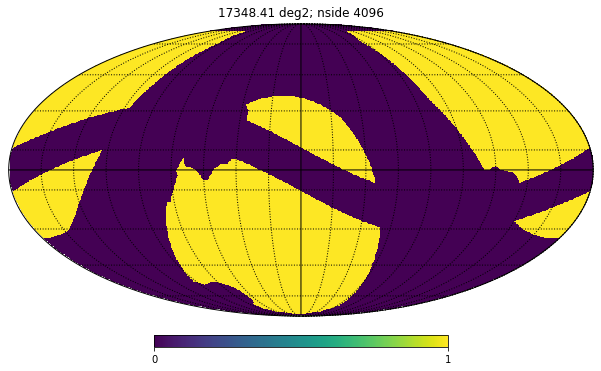

CPU times: user 1.32 s, sys: 740 ms, total: 2.06 s
Wall time: 2.08 s


In [6]:
%%time

nside = 4096
plot_skymap(mask_in=mask, nside=nside)

<Figure size 432x288 with 0 Axes>

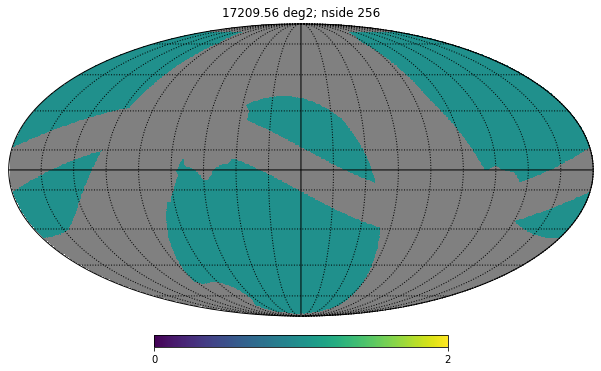

CPU times: user 8.94 s, sys: 5.6 s, total: 14.5 s
Wall time: 14.6 s


In [7]:
%%time
nside = 256
mask[mask == 0] = np.nan  # this will nesure that the outside-footprint pixels are not accounted for with pess=Trye
mask_ud = hp.ud_grade(mask, nside_out=nside, pess=True)

# plot it out
plot_skymap(mask_in=mask_ud, nside=nside)

okay we appear to lose some area (~0.8%) due to the pixelization change.

lets now save the pixels of the footprint. lets first check what values exist in the new map.

In [8]:
print(np.unique(mask_ud))

[-1.6375e+30  1.0000e+00]


okay good - only two values

In [9]:
fname = '%s/euclid_footprint_pixels_nside256.csv' % outdir
pd.DataFrame({'pixels': np.where(mask_ud > 0)[0]}).to_csv(fname, index=False)

lets read in the mask to confirm things are consistent

<Figure size 432x288 with 0 Axes>

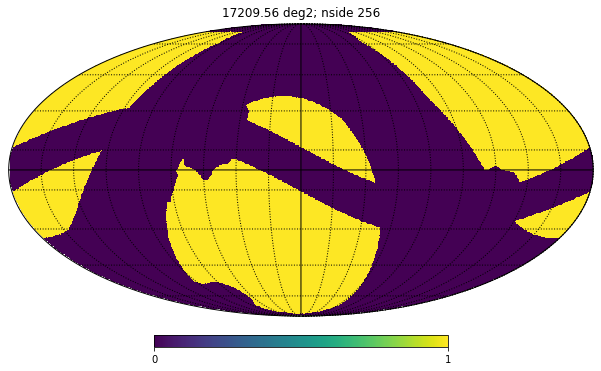

In [10]:
pixels = pd.read_csv(fname).values.flatten()

mask_saved = np.zeros(hp.nside2npix(256))
mask_saved[pixels] = 1

# plot it out
plot_skymap(mask_in=mask_saved, nside=256)

okay things look alright.